In [1]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [ ]:
# Obtenemos los datos
df = pd.read_csv('./typedCSV.csv', delimiter=',')
df

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,pixel 16,pixel 17,pixel 18,pixel 19,pixel 20,pixel 21,pixel 22,pixel 23,pixel 24,pixel 25,pixel 26,pixel 27,pixel 28,pixel 29,pixel 30,pixel 31,pixel 32,pixel 33,pixel 34,pixel 35,pixel 36,pixel 37,pixel 38,pixel 39,pixel 40,pixel 41,pixel 42,pixel 43,pixel 44,pixel 45,pixel 46,pixel 47,pixel 48,pixel 49,pixel 50,pixel 51,pixel 52,pixel 53,pixel 54,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,pixel 64,pixel 65,pixel 66,pixel 67,pixel 68,pixel 69,pixel 70,pixel 71,pixel 72,pixel 73,pixel 74,pixel 75,pixel 76,pixel 77,pixel 78,pixel 79,pixel 80,pixel 81,pixel 82,pixel 83,pixel 84,pixel 85,pixel 86,pixel 87,pixel 88,pixel 89,pixel 90,pixel 91,pixel 92,pixel 93,pixel 94,pixel 95,pixel 96,pixel 97,pixel 98,pixel 99,pixel 100,pixel 101,pixel 102,pixel 103,pixel 104,pixel 105,pixel 106,pixel 107,pixel 108,pixel 109,pixel 110,pixel 111,pixel 112,pixel 113,pixel 114,pixel 115,pixel 116,pixel 117,pixel 118,pixel 119,pixel 120,pixel 121,pixel 122,pixel 123,pixel 124,pixel 125,pixel 126,pixel 127,pixel 128,pixel 129,pixel 130,pixel 131,pixel 132,pixel 133,pixel 134,pixel 135,pixel 136,pixel 137,pixel 138,pixel 139,pixel 140,pixel 141,pixel 142,pixel 143,pixel 144,pixel 145,pixel 146,pixel 147,pixel 148,pixel 149,pixel 150,pixel 151,pixel 152,pixel 153,pixel 154,pixel 155,pixel 156,pixel 157,pixel 158,pixel 159,pixel 160,pixel 161,pixel 162,pixel 163,pixel 164,pixel 165,pixel 166,pixel 167,pixel 168,pixel 169,pixel 170,pixel 171,pixel 172,pixel 173,pixel 174,pixel 175,pixel 176,pixel 177,pixel 178,pixel 179,pixel 180,pixel 181,pixel 182,pixel 183,pixel 184,pixel 185,pixel 186,pixel 187,pixel 188,pixel 189,pixel 190,pixel 191,pixel 192,pixel 193,pixel 194,pixel 195,pixel 196,pixel 197,pixel 198,pixel 199,pixel 200,pixel 201,pixel 202,pixel 203,pixel 204,pixel 205,pixel 206,pixel 207,pixel 208,pixel 209,pixel 210,pixel 211,pixel 212,pixel 213,pixel 214,pixel 215,pixel 216,pixel 217,pixel 218,pixel 219,pixel 220,pixel 221,pixel 222,pixel 223,pixel 224,pixel 225,pixel 226,pixel 227,pixel 228,pixel 229,pixel 230,pixel 231,pixel 232,pixel 233,pixel 234,pixel 235,pixel 236,pixel 237,pixel 238,pixel 239,pixel 240,pixel 241,pixel 242,pixel 243,pixel 244,pixel 245,pixel 246,pixel 247,pixel 248,pixel 249,pixel 250,pixel 251,pixel 252,pixel 253,pixel 254,pixel 255,pixel 256,pixel 257,pixel 258,pixel 259,pixel 260,pixel 261,pixel 262,pixel 263,pixel 264,pixel 265,pixel 266,pixel 267,pixel 268,pixel 269,pixel 270,pixel 271,pixel 272,pixel 273,pixel 274,pixel 275,pixel 276,pixel 277,pixel 278,pixel 279,pixel 280,pixel 281,pixel 282,pixel 283,pixel 284,pixel 285,pixel 286,pixel 287,pixel 288,pixel 289,pixel 290,pixel 291,pixel 292,pixel 293,pixel 294,pixel 295,pixel 296,pixel 297,pixel 298,pixel 299,pixel 300,pixel 301,pixel 302,pixel 303,pixel 304,pixel 305,pixel 306,pixel 307,pixel 308,pixel 309,pixel 310,pixel 311,pixel 312,pixel 313,pixel 314,pixel 315,pixel 316,pixel 317,pixel 318,pixel 319,pixel 320,pixel 321,pixel 322,pixel 323,pixel 324,pixel 325,pixel 326,pixel 327,pixel 328,pixel 329,pixel 330,pixel 331,pixel 332,pixel 333,pixel 334,pixel 335,pixel 336,pixel 337,pixel 338,pixel 339,pixel 340,pixel 341,pixel 342,pixel 343,pixel 344,pixel 345,pixel 346,pixel 347,pixel 348,pixel 349,pixel 350,pixel 351,pixel 352,pixel 353,pixel 354,pixel 355,pixel 356,pixel 357,pixel 358,pixel 359,pixel 360,pixel 361,pixel 362,pixel 363,pixel 364,pixel 365,pixel 366,pixel 367,pixel 368,pixel 369,pixel 370,pixel 371,pixel 372,pixel 373,pixel 374,pixel 375,pixel 376,pixel 377,pixel 378,pixel 379,pixel 380,pixel 381,pixel 382,pixel 383,pixel 384,pixel 385,pixel 386,pixel 387,pixel 388,pixel 389,pixel 390,pixel 391,pixel 392,pixel 393,pixel 394,pixel 395,pixel 396,pixel 397,pixel 398,pixel 399,pixel 400,pixel 401,pixel 402,pixel 403,pixel 404,pixel 405,pixel 406,pixel 407,pixel 408,pixel 409,pix

In [ ]:
# Definir el rango de las etiquetas que desamos seleccionar 
start_label = 10
end_label = 35

# Filtrar las filas del DataFrame que contienen las etiquetas seleccionadas
df_filtered = df.loc[df['label'].between(start_label, end_label)]

# Creamos un nuevo dataset con las filas seleccionadas
data = pd.DataFrame(df_filtered)

# Mostramos los nuevos datos
print(data.shape)
data

(26416, 785)


,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,pixel 16,pixel 17,pixel 18,pixel 19,pixel 20,pixel 21,pixel 22,pixel 23,pixel 24,pixel 25,pixel 26,pixel 27,pixel 28,pixel 29,pixel 30,pixel 31,pixel 32,pixel 33,pixel 34,pixel 35,pixel 36,pixel 37,pixel 38,pixel 39,pixel 40,pixel 41,pixel 42,pixel 43,pixel 44,pixel 45,pixel 46,pixel 47,pixel 48,pixel 49,pixel 50,pixel 51,pixel 52,pixel 53,pixel 54,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,pixel 64,pixel 65,pixel 66,pixel 67,pixel 68,pixel 69,pixel 70,pixel 71,pixel 72,pixel 73,pixel 74,pixel 75,pixel 76,pixel 77,pixel 78,pixel 79,pixel 80,pixel 81,pixel 82,pixel 83,pixel 84,pixel 85,pixel 86,pixel 87,pixel 88,pixel 89,pixel 90,pixel 91,pixel 92,pixel 93,pixel 94,pixel 95,pixel 96,pixel 97,pixel 98,pixel 99,pixel 100,pixel 101,pixel 102,pixel 103,pixel 104,pixel 105,pixel 106,pixel 107,pixel 108,pixel 109,pixel 110,pixel 111,pixel 112,pixel 113,pixel 114,pixel 115,pixel 116,pixel 117,pixel 118,pixel 119,pixel 120,pixel 121,pixel 122,pixel 123,pixel 124,pixel 125,pixel 126,pixel 127,pixel 128,pixel 129,pixel 130,pixel 131,pixel 132,pixel 133,pixel 134,pixel 135,pixel 136,pixel 137,pixel 138,pixel 139,pixel 140,pixel 141,pixel 142,pixel 143,pixel 144,pixel 145,pixel 146,pixel 147,pixel 148,pixel 149,pixel 150,pixel 151,pixel 152,pixel 153,pixel 154,pixel 155,pixel 156,pixel 157,pixel 158,pixel 159,pixel 160,pixel 161,pixel 162,pixel 163,pixel 164,pixel 165,pixel 166,pixel 167,pixel 168,pixel 169,pixel 170,pixel 171,pixel 172,pixel 173,pixel 174,pixel 175,pixel 176,pixel 177,pixel 178,pixel 179,pixel 180,pixel 181,pixel 182,pixel 183,pixel 184,pixel 185,pixel 186,pixel 187,pixel 188,pixel 189,pixel 190,pixel 191,pixel 192,pixel 193,pixel 194,pixel 195,pixel 196,pixel 197,pixel 198,pixel 199,pixel 200,pixel 201,pixel 202,pixel 203,pixel 204,pixel 205,pixel 206,pixel 207,pixel 208,pixel 209,pixel 210,pixel 211,pixel 212,pixel 213,pixel 214,pixel 215,pixel 216,pixel 217,pixel 218,pixel 219,pixel 220,pixel 221,pixel 222,pixel 223,pixel 224,pixel 225,pixel 226,pixel 227,pixel 228,pixel 229,pixel 230,pixel 231,pixel 232,pixel 233,pixel 234,pixel 235,pixel 236,pixel 237,pixel 238,pixel 239,pixel 240,pixel 241,pixel 242,pixel 243,pixel 244,pixel 245,pixel 246,pixel 247,pixel 248,pixel 249,pixel 250,pixel 251,pixel 252,pixel 253,pixel 254,pixel 255,pixel 256,pixel 257,pixel 258,pixel 259,pixel 260,pixel 261,pixel 262,pixel 263,pixel 264,pixel 265,pixel 266,pixel 267,pixel 268,pixel 269,pixel 270,pixel 271,pixel 272,pixel 273,pixel 274,pixel 275,pixel 276,pixel 277,pixel 278,pixel 279,pixel 280,pixel 281,pixel 282,pixel 283,pixel 284,pixel 285,pixel 286,pixel 287,pixel 288,pixel 289,pixel 290,pixel 291,pixel 292,pixel 293,pixel 294,pixel 295,pixel 296,pixel 297,pixel 298,pixel 299,pixel 300,pixel 301,pixel 302,pixel 303,pixel 304,pixel 305,pixel 306,pixel 307,pixel 308,pixel 309,pixel 310,pixel 311,pixel 312,pixel 313,pixel 314,pixel 315,pixel 316,pixel 317,pixel 318,pixel 319,pixel 320,pixel 321,pixel 322,pixel 323,pixel 324,pixel 325,pixel 326,pixel 327,pixel 328,pixel 329,pixel 330,pixel 331,pixel 332,pixel 333,pixel 334,pixel 335,pixel 336,pixel 337,pixel 338,pixel 339,pixel 340,pixel 341,pixel 342,pixel 343,pixel 344,pixel 345,pixel 346,pixel 347,pixel 348,pixel 349,pixel 350,pixel 351,pixel 352,pixel 353,pixel 354,pixel 355,pixel 356,pixel 357,pixel 358,pixel 359,pixel 360,pixel 361,pixel 362,pixel 363,pixel 364,pixel 365,pixel 366,pixel 367,pixel 368,pixel 369,pixel 370,pixel 371,pixel 372,pixel 373,pixel 374,pixel 375,pixel 376,pixel 377,pixel 378,pixel 379,pixel 380,pixel 381,pixel 382,pixel 383,pixel 384,pixel 385,pixel 386,pixel 387,pixel 388,pixel 389,pixel 390,pixel 391,pixel 392,pixel 393,pixel 394,pixel 395,pixel 396,pixel 397,pixel 398,pixel 399,pixel 400,pixel 401,pixel 402,pixel 403,pixel 404,pixel 405,pixel 406,pixel 407,pixel 408,pixel 409,pix

In [ ]:
# Mezclamos el conjunto de datos para que esten de manera aleatoria
data_ = shuffle(data, random_state=42)

In [ ]:
# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']
m_train = len(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

--------------------------------------------------------------------------------
El 80% de ejemplos que seran para el entrenamiento son: 21132
El 20% de ejemplos que seran para el entrenamiento son: 5284


In [ ]:
# Mostramos los datos de entrenamiento 
X_train

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,pixel 16,pixel 17,pixel 18,pixel 19,pixel 20,pixel 21,pixel 22,pixel 23,pixel 24,pixel 25,pixel 26,pixel 27,pixel 28,pixel 29,pixel 30,pixel 31,pixel 32,pixel 33,pixel 34,pixel 35,pixel 36,pixel 37,pixel 38,pixel 39,pixel 40,pixel 41,pixel 42,pixel 43,pixel 44,pixel 45,pixel 46,pixel 47,pixel 48,pixel 49,pixel 50,pixel 51,pixel 52,pixel 53,pixel 54,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,pixel 64,pixel 65,pixel 66,pixel 67,pixel 68,pixel 69,pixel 70,pixel 71,pixel 72,pixel 73,pixel 74,pixel 75,pixel 76,pixel 77,pixel 78,pixel 79,pixel 80,pixel 81,pixel 82,pixel 83,pixel 84,pixel 85,pixel 86,pixel 87,pixel 88,pixel 89,pixel 90,pixel 91,pixel 92,pixel 93,pixel 94,pixel 95,pixel 96,pixel 97,pixel 98,pixel 99,pixel 100,pixel 101,pixel 102,pixel 103,pixel 104,pixel 105,pixel 106,pixel 107,pixel 108,pixel 109,pixel 110,pixel 111,pixel 112,pixel 113,pixel 114,pixel 115,pixel 116,pixel 117,pixel 118,pixel 119,pixel 120,pixel 121,pixel 122,pixel 123,pixel 124,pixel 125,pixel 126,pixel 127,pixel 128,pixel 129,pixel 130,pixel 131,pixel 132,pixel 133,pixel 134,pixel 135,pixel 136,pixel 137,pixel 138,pixel 139,pixel 140,pixel 141,pixel 142,pixel 143,pixel 144,pixel 145,pixel 146,pixel 147,pixel 148,pixel 149,pixel 150,pixel 151,pixel 152,pixel 153,pixel 154,pixel 155,pixel 156,pixel 157,pixel 158,pixel 159,pixel 160,pixel 161,pixel 162,pixel 163,pixel 164,pixel 165,pixel 166,pixel 167,pixel 168,pixel 169,pixel 170,pixel 171,pixel 172,pixel 173,pixel 174,pixel 175,pixel 176,pixel 177,pixel 178,pixel 179,pixel 180,pixel 181,pixel 182,pixel 183,pixel 184,pixel 185,pixel 186,pixel 187,pixel 188,pixel 189,pixel 190,pixel 191,pixel 192,pixel 193,pixel 194,pixel 195,pixel 196,pixel 197,pixel 198,pixel 199,pixel 200,pixel 201,pixel 202,pixel 203,pixel 204,pixel 205,pixel 206,pixel 207,pixel 208,pixel 209,pixel 210,pixel 211,pixel 212,pixel 213,pixel 214,pixel 215,pixel 216,pixel 217,pixel 218,pixel 219,pixel 220,pixel 221,pixel 222,pixel 223,pixel 224,pixel 225,pixel 226,pixel 227,pixel 228,pixel 229,pixel 230,pixel 231,pixel 232,pixel 233,pixel 234,pixel 235,pixel 236,pixel 237,pixel 238,pixel 239,pixel 240,pixel 241,pixel 242,pixel 243,pixel 244,pixel 245,pixel 246,pixel 247,pixel 248,pixel 249,pixel 250,pixel 251,pixel 252,pixel 253,pixel 254,pixel 255,pixel 256,pixel 257,pixel 258,pixel 259,pixel 260,pixel 261,pixel 262,pixel 263,pixel 264,pixel 265,pixel 266,pixel 267,pixel 268,pixel 269,pixel 270,pixel 271,pixel 272,pixel 273,pixel 274,pixel 275,pixel 276,pixel 277,pixel 278,pixel 279,pixel 280,pixel 281,pixel 282,pixel 283,pixel 284,pixel 285,pixel 286,pixel 287,pixel 288,pixel 289,pixel 290,pixel 291,pixel 292,pixel 293,pixel 294,pixel 295,pixel 296,pixel 297,pixel 298,pixel 299,pixel 300,pixel 301,pixel 302,pixel 303,pixel 304,pixel 305,pixel 306,pixel 307,pixel 308,pixel 309,pixel 310,pixel 311,pixel 312,pixel 313,pixel 314,pixel 315,pixel 316,pixel 317,pixel 318,pixel 319,pixel 320,pixel 321,pixel 322,pixel 323,pixel 324,pixel 325,pixel 326,pixel 327,pixel 328,pixel 329,pixel 330,pixel 331,pixel 332,pixel 333,pixel 334,pixel 335,pixel 336,pixel 337,pixel 338,pixel 339,pixel 340,pixel 341,pixel 342,pixel 343,pixel 344,pixel 345,pixel 346,pixel 347,pixel 348,pixel 349,pixel 350,pixel 351,pixel 352,pixel 353,pixel 354,pixel 355,pixel 356,pixel 357,pixel 358,pixel 359,pixel 360,pixel 361,pixel 362,pixel 363,pixel 364,pixel 365,pixel 366,pixel 367,pixel 368,pixel 369,pixel 370,pixel 371,pixel 372,pixel 373,pixel 374,pixel 375,pixel 376,pixel 377,pixel 378,pixel 379,pixel 380,pixel 381,pixel 382,pixel 383,pixel 384,pixel 385,pixel 386,pixel 387,pixel 388,pixel 389,pixel 390,pixel 391,pixel 392,pixel 393,pixel 394,pixel 395,pixel 396,pixel 397,pixel 398,pixel 399,pixel 400,pixel 401,pixel 402,pixel 403,pixel 404,pixel 405,pixel 406,pixel 407,pixel 408,pixel 409,pixel 410

In [ ]:
# Normalizar las imágenes de entrenamiento y prueba
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0

In [ ]:
# Mostramos los datos de entrenamiento normalizados
X_train_ 

pixel 0   pixel 1   pixel 2   pixel 3   pixel 4   pixel 5   pixel 6  \
24826  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
16362  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
21512  1.000000  0.988235  0.992157  1.000000  0.996078  1.000000  1.000000   
35285  0.988235  1.000000  0.988235  1.000000  0.996078  0.992157  0.992157   
28995  1.000000  1.000000  1.000000  0.984314  1.000000  0.992157  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
31735  1.000000  1.000000  0.988235  1.000000  0.980392  0.992157  1.000000   
15550  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
11020  0.996078  1.000000  0.996078  1.000000  1.000000  1.000000  1.000000   
25955  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
33814  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

        pixel 7   pixel 8   pixel 9  pixel 10  pixel 11  pixel 12  pixel 13  \
24826  1.000000  1.000000  0.976471  0.992157  1.000000  0.968627  1.000000   
16362  1.000000  0.992157  1.000000  1.000000  1.000000  0.984314  1.000000   
21512  0.984314  1.000000  0.984314  1.000000  1.000000  0.988235  1.000000   
35285  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
28995  1.000000  1.000000  0.988235  0.988235  0.996078  1.000000  0.996078   
...         ...       ...       ...       ...       ...       ...       ...   
31735  1.000000  0.996078  1.000000  0.996078  1.000000  0.996078  1.000000   
15550  1.000000  0.996078  1.000000  1.000000  1.000000  0.976471  1.000000   
11020  0.996078  0.996078  0.988235  1.000000  1.000000  0.984314  1.000000   
25955  1.000000  1.000000  0.980392  1.000000  1.000000  1.000000  0.988235   
33814  1.000000  1.000000  0.976471  1.000000  1.000000  0.984314  1.000000   

       pixel 14  pixel 15  pixel 16  pixel 17  pixel 18  pixel 19  pixel 20  \
24826  1.000000  1.000000  1.000000  1.000000  1.000000  0.988235  1.000000   
16362  1.000000  0.992157  1.000000  0.996078  0.996078  1.000000  1.000000   
21512  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
35285  1.000000  0.992157  1.000000  0.988235  1.000000  1.000000  0.984314   
28995  0.992157  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
31735  0.996078  1.000000  1.000000  1.000000  1.000000  1.000000  0.992157   
15550  0.992157  0.992157  0.996078  1.000000  1.000000  0.980392  1.000000   
11020  0.984314  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
25955  1.000000  0.992157  0.988235  1.000000  1.000000  0.972549  1.000000   
33814  1.000000  0.996078  1.000000  0.996078  1.000000  0.988235  1.000000   

       pixel 21  pixel 22  pixel 23  pixel 24  pixel 25  pixel 26  pixel 27  \
24826  0.976471  0.992157  1.000000  1.000000  1.000000  1.000000  1.000000   
16362  0.972549  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
21512  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
35285  1.000000  0.980392  1.000000  1.000000  1.000000  1.000000  1.000000   
28995  1.000000  1.000000  0.996078  1.000000  1.000000  1.000000  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
31735  1.000000  1.000000  1.000000  0.988235  1.000000  1.000000  0.980392   
15550  0.996078  0.984314  1.000000  1.000000  0.992157  0.992157  1.000000   
11020  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
25955  0.996078  1.000000  1.000000  1.000000  0.996078  1.000000  0.996078   
33814  0.996078  1.000000  0.992157  1.000000  0.996078  1.000000  1.000000   

       pixel 28  pixel 29  pixel 30  pixel 31  pixel 32  pixel 33  pixel 34  \
24826  1.000000  1.000000  1.000000  1.000000  1.000000       1.0  1.000000   
16362  1.000000  1.000000  1.000000  1.000000  1.00000

In [ ]:
from sklearn.cluster import KMeans

k = 200
kmeans = KMeans(n_clusters=k, random_state=42)

X_digits_dist = kmeans.fit_transform(X_train_)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculamos el coeficiente de silueta para evaluar la calidad de los clústeres
silhouette_score(X_train_, kmeans.labels_)

np.float64(0.1630962869278483)

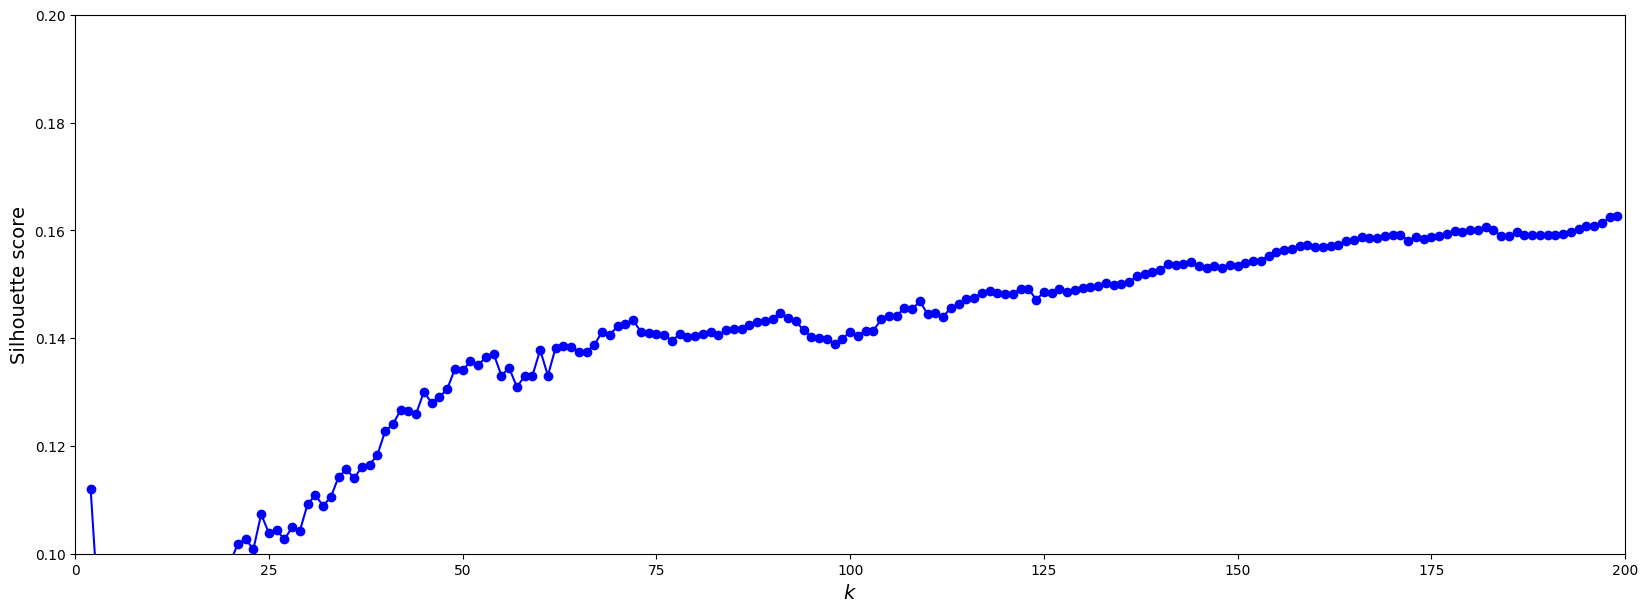

In [ ]:
from sklearn.metrics import silhouette_score

# Creamos una lista de modelos de Means ajustados para diferentes números de clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_) for k in range(1, 200)]

# Calculamos los coeficientes de silueta para cada modelo KMeans (excepto el primero, con un solo cluster)
silhouette_scores = [silhouette_score(X_train_, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(20, 7))

# Graficar el coeficiente de silueta en función del número de clusters (de 2 a n)
plt.plot(range(2, 200), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Establecemos los límites de los ejes de X e Y para enfocar la visualización en un rango específico
plt.axis([0, 200, 0.1, 0.20])

plt.show()

In [ ]:
# Encontrar el índice del máximo coeficiente de silueta
max_index = np.argmax(silhouette_scores)

# Calcular el valor de k correspondiente al máximo coeficiente de silueta
mejor_K = max_index + 2

# Imprimir el valor de k que maximiza el coeficiente de silueta
print("El valor óptimo de k es:", mejor_K)

El valor óptimo de k es: 199


In [ ]:
print(kmeans_per_k)

# Imprimir los coeficientes de silueta para cada modelo KMeans ajustado
silhouette_scores

[KMeans(n_clusters=1, random_state=42), KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42), KMeans(n_clusters=9, random_state=42), KMeans(n_clusters=10, random_state=42), KMeans(n_clusters=11, random_state=42), KMeans(n_clusters=12, random_state=42), KMeans(n_clusters=13, random_state=42), KMeans(n_clusters=14, random_state=42), KMeans(n_clusters=15, random_state=42), KMeans(n_clusters=16, random_state=42), KMeans(n_clusters=17, random_state=42), KMeans(n_clusters=18, random_state=42), KMeans(n_clusters=19, random_state=42), KMeans(n_clusters=20, random_state=42), KMeans(n_clusters=21, random_state=42), KMeans(n_clusters=22, random_state=42), KMeans(n_clusters=23, random_state=42), KMeans(n_clusters=24, random_state=42), KMeans(n_clusters=25, random_state=42), KMeans(n_clusters=26, 

[np.float64(0.11192952213064387),
 np.float64(0.08963377124847731),
 np.float64(0.0776474058985929),
 np.float64(0.0717040961824833),
 np.float64(0.07549034707055287),
 np.float64(0.07384794668087477),
 np.float64(0.06627423241912499),
 np.float64(0.0761175610744533),
 np.float64(0.07620633378727516),
 np.float64(0.07904161911825512),
 np.float64(0.08139220746201305),
 np.float64(0.082818359801813),
 np.float64(0.08087810022652579),
 np.float64(0.08426862130275832),
 np.float64(0.08592801500540666),
 np.float64(0.08873049740938907),
 np.float64(0.0899546007206995),
 np.float64(0.09771145222614604),
 np.float64(0.09834315099653423),
 np.float64(0.10188831068889181),
 np.float64(0.1026819914644876),
 np.float64(0.10084003844278731),
 np.float64(0.10731974770331983),
 np.float64(0.1038534275952637),
 np.float64(0.10435460489844599),
 np.float64(0.10268061859584215),
 np.float64(0.1049013283824443),
 np.float64(0.10427308588850019),
 np.float64(0.10925026440941556),
 np.float64(0.110853295

KMEANS para aprendizaje Semi-Supervisado

In [ ]:
from sklearn.cluster import KMeans

k = 199  # Números de clusters

# Instanciamos el modelo KMeans con el número de clusters k
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo KMeans a los datos y transformar los datos en distancias de cada punto a los centroides de los clusters
X_digits_dist = kmeans.fit_transform(X_train_)

In [ ]:
# Mostramos el número de ejemplos en cada grupo
print(X_digits_dist.shape)
# Mostramos las distancias de cada muestra a los centroides de los k clusters
print(X_digits_dist)

(21132, 199)
[[ 9.06476167  8.36495218  7.90115568 ...  9.37373307  9.21055189
  12.31163129]
 [10.02197487  8.38427689  7.27460618 ...  8.68341175  8.9679237
  12.92101055]
 [ 8.52543334  8.99227229  8.94953979 ...  9.20471536  5.82761493
  12.48760155]
 ...
 [ 9.50715321  9.67805288  9.41318848 ...  8.49423291  8.14086662
  11.82807462]
 [11.19677487  6.23500308  9.21699693 ...  8.73219733  9.44013823
  11.13779848]
 [10.76317179  8.41094635  6.31720817 ...  9.24898723  9.62205363
  14.05329395]]


In [ ]:
# Encontrar el índice del punto más cercano a cada centroide (cluster)
idxs = np.argmin(X_digits_dist, axis=0)

# Seleccionar los puntos representativos (centroides) de cada cluster
X_representative_digits = X_train_.values[idxs]

In [ ]:
# Imprimimos los indices de los puntos minimos 
print(idxs.shape)
print(idxs)

# Imprimimos los puntos de las muestras representativos
print(X_representative_digits.shape)
print(X_representative_digits)


(199,)
[11939  6360  7229  6043  9886  7407  1283  2091  8370  5381 12948 19589
  7187  3611  4013 14260  4552   345 13466 14534 16608 15558  5197  7780
   556 10537 10127   138  7387  7788 19535  5996  9911  5966  4906 18740
  6232 12506  8190  2054 13029 20470   697 12075  5145  5273 18871 11521
 17682  2538  3813  8947  3258   305 17231   631  3672  3120  8707  3329
  6230  3121  8233 11873 11255 18149  5020 13806 14592   180 21003   982
 15328  5267  3935 10592  5369  2965 17031 10850 11855 11535  6828  5345
 10779 17967 19794  1236 19117  1426   764  3498 14204 15962  8387   441
  8400  9358 18253 10882  2971 11164  7810  8274   277 20482   639  4360
 16738  1483  4909  1704  2822  7119 19424  8932  2240 18879  9524  2979
  9227 19576 14420 11891  8757 14951  6510  3082 20371   268  4458 13172
  1747 15361 18574 15864  1530  2316  6150   413   499 10629 18588 15381
  2432  6293 15295  1011 19704 16580 11853  7386 11306  8136  7435 19053
  8087  4447  3923 14748 14127 20655  7970  

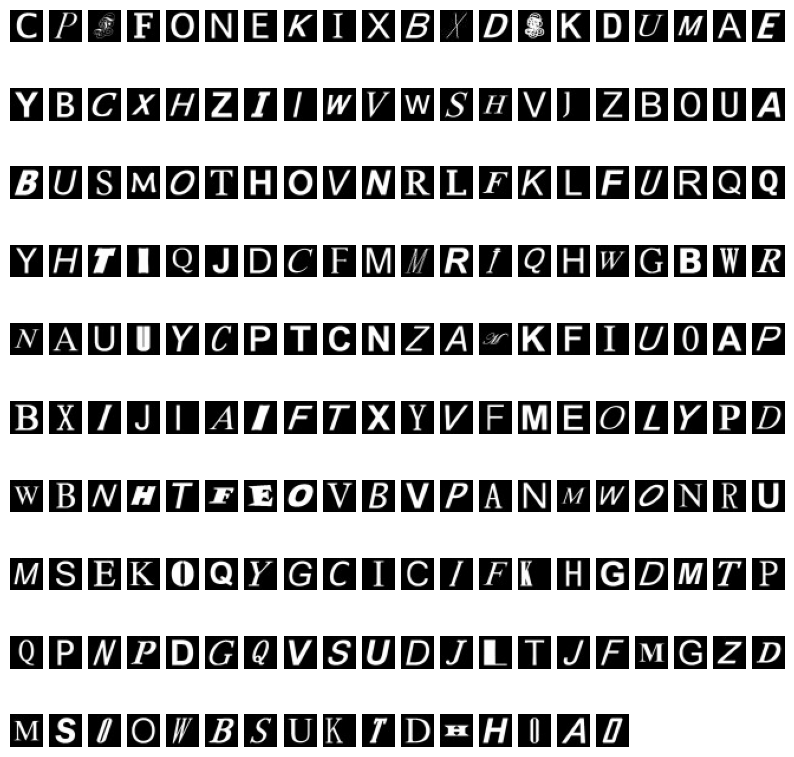

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Determinar el número máximo de subplots a mostrar (máximo 196 en una cuadrícula de 14x14)
max_subplots = min(len(X_representative_digits), 196)

for index in range(max_subplots):
    plt.subplot(10, 20, index + 1)
    
    # Mostrar la imagen del dígito representativo correspondiente al índice actual
    plt.imshow(X_representative_digits[index].reshape(28, 28), cmap="binary")
    plt.axis('off')

plt.show()

In [ ]:
# Obtener las etiquetas verdaderas de los dígitos representativos encontrados por K-means
y_representative_digits = y_train.values[idxs]

# Mostramos las etiquetas de las muestras representativas
print(y_representative_digits.shape)
print(y_representative_digits)

(199,)
[12 25 15 15 24 23 14 20 18 33 11 33 13 15 20 13 30 22 10 14 34 11 12 33
 17 35 18 18 32 31 32 28 17 31 19 35 11 24 30 10 11 30 28 22 24 29 17 24
 31 23 27 21 15 20 21 15 30 27 26 26 34 17 29 18 26 19 13 12 15 22 22 27
 18 26 17 32 16 11 32 27 23 10 30 30 34 12 25 29 12 23 35 10 22 20 15 18
 30 24 10 25 11 33 18 19 18 10 18 15 29 33 34 31 15 22 14 24 21 34 25 13
 32 11 23 17 29 15 14 24 31 11 31 25 10 23 22 32 24 23 27 30 22 28 14 20
 24 26 34 16 12 18 12 18 15 20 17 16 13 22 29 25 26 25 23 25 13 16 26 31
 28 30 13 19 21 29 19 15 22 16 35 13 22 28 24 24 32 11 28 30 20 29 13 17
 17 24 10 24 25 21 11]


Entrenamiento de un Clasificador

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear un clasificador de regresión logística
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)

# Entrenar el clasificador con los datos representativos y sus etiquetas
%time log_reg2.fit(X_representative_digits, y_representative_digits)

# Calcular el puntaje de precisión del clasificador en el conjunto de prueba
log_reg2.score(X_test_, y_test)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 531 ms
Wall time: 569 ms


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7437547312641938

In [ ]:
# Crear un clasificador de regresión logística
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)

# Entrenar el clasificador con una porción de los datos de entrenamiento y sus etiquetas correspondientes
%time log_reg.fit(X_train_, y_train)

# Calcular el puntaje de precisión del clasificador en el conjunto de prueba completo
log_reg.score(X_test_, y_test)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 4min 56s
Wall time: 51 s


0.9142694928084785

In [ ]:
# Crear un array vacío para almacenar las etiquetas propagadas
y_train_propagated = np.empty(len(X_train_))

# Iterar sobre cada cluster (i) generado por KMeans
for i in range(k):
    # Asignamos las etiquetas de los datos representativos del cluster (i) a todos los puntos del mismo cluster en X_train
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [ ]:

# Mostramos las etiquetas propagadas
print(y_train_propagated.shape)
print(y_train_propagated)

(21132,)
[12. 22. 18. ... 32. 25. 33.]


In [ ]:
# Creamos un clasificador de regresión logística con las etiquetas propagadas
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)
%time log_reg3.fit(X_train_, y_train_propagated)
log_reg3.score(X_test_, y_test)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 4min 17s
Wall time: 44.6 s


0.7214231642694928

APRENDIZAJE ACTIVO

In [ ]:
# Obtener las probabilidades de predicción para las primeras 5000 muestras en X_train_ utilizando el modelo log_reg3
probas = log_reg3.predict_proba(X_train_)

# Determinar la clase predicha para cada muestra en base a las probabilidades de predicción
labels_ixs = np.argmax(probas, axis=1)

# Obtener las probabilidades asociadas con la clase predicha para cada muestra
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])

# Ordenar los índices de las muestras en función de las probabilidades predichas (de menor a mayor)
sorted_ixs = np.argsort(labels)

# Seleccionar las probabilidades de predicción de las 50 muestras con menor confianza según el modelo
labels[sorted_ixs[:800]]

array([0.21674862, 0.25421991, 0.25785618, 0.2605559 , 0.26864344,
       0.26944838, 0.27089776, 0.27189   , 0.27200729, 0.27395434,
       0.2788537 , 0.27932883, 0.28785974, 0.28819629, 0.29095342,
       0.29520878, 0.29595664, 0.29601181, 0.29667665, 0.29969741,
       0.29969741, 0.30007528, 0.30051706, 0.30154268, 0.30219948,
       0.30327316, 0.30416452, 0.30470907, 0.30577668, 0.31089743,
       0.31135062, 0.31200391, 0.31232701, 0.31234606, 0.31546165,
       0.31612249, 0.318037  , 0.31881509, 0.32053104, 0.32103406,
       0.32103406, 0.32150315, 0.32372168, 0.32473455, 0.32529417,
       0.3264566 , 0.32734352, 0.33077239, 0.33096663, 0.33137306,
       0.33183733, 0.33193414, 0.33204777, 0.33218898, 0.33225311,
       0.33231049, 0.33309785, 0.33323778, 0.33432392, 0.33464693,
       0.33484648, 0.33486855, 0.33594834, 0.33667991, 0.33684284,
       0.33774974, 0.33916172, 0.3395344 , 0.34024486, 0.34032263,
       0.34048035, 0.34140811, 0.34171589, 0.34247501, 0.34388

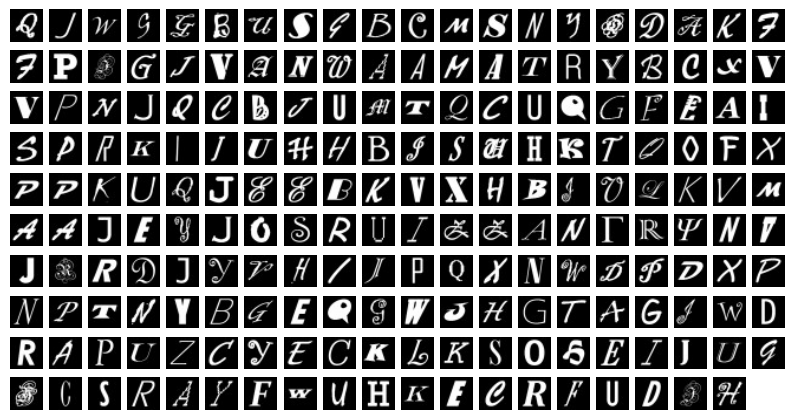

In [ ]:
# Extrae las características (imágenes) correspondientes a las k muestras con mayor incertidumbre del conjunto de entrenamiento.
X_lowest = X_train_.values[sorted_ixs[:k]]

plt.figure(figsize=(10, 10))

for index, img in enumerate(X_lowest):
    plt.subplot(k // 10, 20, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [ ]:
# Extracción de las Etiquetas de las Muestras con Mayor Incertidumbre
y_lowest = y_train.values[sorted_ixs[:k]]

# Mostramos las etiquetas de las muestras con mayor incertidumbre
print(y_lowest.shape)
print(y_lowest)

(199,)
[26 19 32 16 16 11 30 28 16 11 12 22 28 23 34 26 13 10 20 15 15 25 18 16
 19 31 10 23 32 10 10 22 10 29 27 34 11 12 33 31 31 25 23 19 26 12 11 19
 30 22 29 26 12 30 26 16 15 14 10 18 28 25 27 20 18 19 30 17 17 11 19 28
 30 17 20 29 26 24 15 33 25 25 20 30 26 19 14 14 11 20 31 33 17 11 19 31
 21 20 31 22 10 10 19 14 34 19 24 28 27 30 18 35 35 10 23 16 27 34 23 31
 19 27 27 13 19 34 31 17 18 19 25 26 33 23 32 13 25 13 33 25 23 25 29 23
 34 11 16 14 26 16 32 19 17 16 29 10 16 19 32 13 27 10 25 30 35 12 34 14
 12 20 21 20 28 24 17 14 18 19 30 16 34 12 28 27 10 34 15 32 30 17 20 14
 12 27 15 30 13 19 17]


In [ ]:
# Actualización de las Etiquetas de las Muestras con Mayor Incertidumbre
y_train2 = y_train_propagated.copy()

# y_train2: Es un arreglo de etiquetas actualizado, donde las etiquetas de las k muestras 
# con mayor incertidumbre en y_train_propagated han sido reemplazadas por las etiquetas correspondientes de y_lowest.
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
y_train2[:k]

array([12., 16., 18., 34., 28., 32., 26., 32., 30., 11., 16., 20., 12.,
       32., 13., 19., 22., 20., 30., 18., 22., 23., 16., 24., 15., 18.,
       16., 32., 24., 15., 24., 33., 19., 33., 17., 13., 14., 10., 14.,
       27., 18., 21., 33., 22., 23., 24., 25., 32., 32., 18., 23., 25.,
       33., 25., 30., 35., 17., 11., 33., 10., 24., 11., 18., 20., 15.,
       21., 22., 32., 20., 33., 32., 10., 25., 15., 15., 10., 24., 31.,
       25., 24., 16., 15., 29., 18., 22., 17., 21., 20., 35., 28., 15.,
       20., 30., 12., 14., 32., 32., 19., 19., 22., 22., 15., 16., 12.,
       18., 30., 32., 18., 18., 10., 16., 29., 32., 10., 26., 14., 29.,
       32., 22., 30., 18., 10., 16., 20., 22., 18., 33., 11., 23., 17.,
       29., 15., 26., 23., 24., 21., 11., 19., 18., 16., 15., 23., 24.,
       33., 30., 15., 15., 19., 24., 17., 26., 30., 29., 18., 18., 22.,
       35., 25., 14., 34., 15., 18., 19., 24., 32., 20., 30., 19., 15.,
       30., 29., 34., 12., 18., 25., 18., 23., 12., 24., 32., 22

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)
%time log_reg5.fit(X_train_, y_train2)

# Calculamos la precisión del clasificador log_reg5 en el conjunto de prueba.
log_reg5.score(X_test_, y_test)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 4min 49s
Wall time: 47.2 s


0.7248296744890235